In [1]:
import sys
sys.path.append("..")
import matplotlib
import matplotlib.pyplot as plt
from LowLevelModules.Spectroscopy import Spectrum
from LowLevelModules.GeneralFunctions import prettify_plot
import numpy as np
import os

File hBNWSe2DRUM_RT_6uW_bright_spot_hole_edge 00.png saved
File hBNWSe2DRUM_RT_6uW_bright_spot_hole_edge 01.png saved
File hBNWSe2DRUM_RT_6uW_center_hole 02.png saved
All spectra exported as PNGs


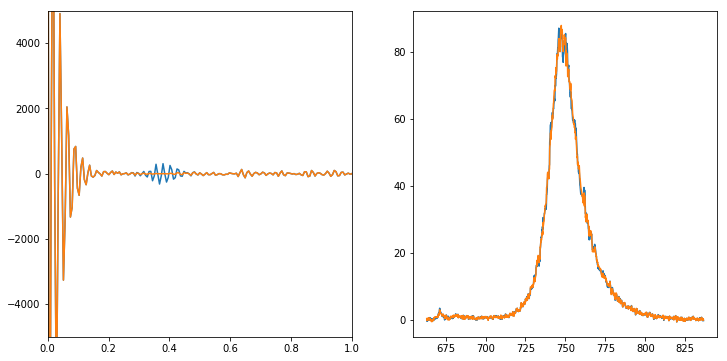

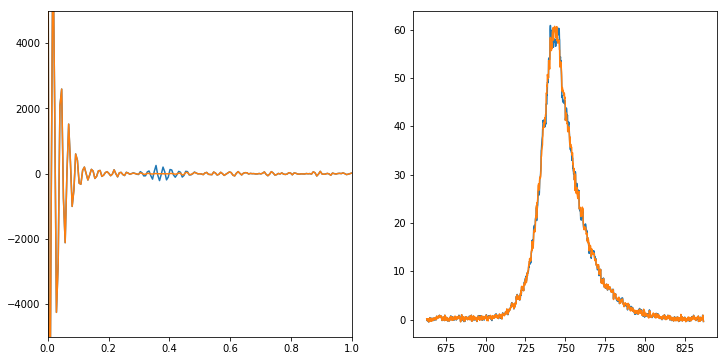

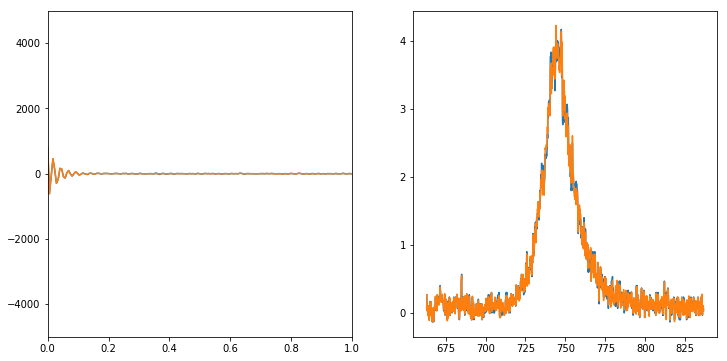

In [4]:
#####################   USER INPUT   ###############################
wdir = r'Z:\Projects\WSe2\2019\07 july\20190730 - WSe2hBN on DRUM\RT gated spectra'
remove_cosmic = False
remove_etaloning = True
## Don't change that
files = [f for f in os.listdir(wdir) if '.spe' in f and 'raw' not in f]

for i, f in enumerate(files):
    save_filename =  f[:-4] + '.png'
    if not save_filename in os.listdir(wdir):
        file = wdir + '\\' + f
        data = Spectrum(file)
        if remove_cosmic:
            data.remove_cosmic_ray(5)
        if remove_etaloning:
            data.remove_etaloning(0.3, 0.45, 0.02, plotplot=False)
        
        #plot
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111)
        ax.plot(data.x, data.y)   
        plt.xlim(data.x[0], data.x[-1])
        plt.ylim(0, 1.05*np.max(data.y))
        prettify_plot(ax, "Wavelength (nm)", "Counts (Hz)")
        fig.tight_layout()
        plt.close(fig)

        # save figure
        fig.savefig(wdir + '\\' + save_filename, format='png', bbox_inches='tight')
        print('File', save_filename, 'saved')
        
print("All spectra exported as PNGs")